In [ ]:
import pandas as pd
import datetime as dt
from dateutil import parser

# Load the flights dataset
df_flights = pd.read_csv('flights.csv')
df_flights.head()

C:\Users\pghawate\AppData\Local\Temp\ipykernel_19856\2032173432.py:6: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv('flights.csv')


,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [3]:
df_flights.tail()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,3/23/19,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.794884
1915882,3/24/19,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106,****,0.538399
1915883,3/25/19,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106,****,0.955579
1915884,3/26/19,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112,****,0.595344
1915885,3/27/19,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117,****,0.350192


In [4]:
df_flights['FL_DATE'].unique()


array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [5]:
# first, make sure everything is a string and drop any leading hyphens
dates = df_flights['FL_DATE'].astype(str).str.lstrip('-')

# now parse flexibly with dateutil
df_flights['FL_DATE'] = dates.apply(lambda x: parser.parse(x, dayfirst=False))

In [6]:
df_flights['FL_DATE'].tail()

1915881   2019-03-23
1915882   2019-03-24
1915883   2019-03-25
1915884   2019-03-26
1915885   2019-03-27
Name: FL_DATE, dtype: datetime64[ns]

In [7]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                     object
DISTANCE                     object
OCCUPANCY_RATE              float64
dtype: object

In [8]:
df_flights['CANCELLED'].dtype
df_flights['CANCELLED'] = df_flights['CANCELLED'].astype('float64')


In [9]:
df_flights = df_flights[df_flights['CANCELLED'] == 0.0]


In [10]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1915876, 1915877, 1915878, 1915879, 1915880, 1915881, 1915882, 1915883,
       1915884, 1915885],
      dtype='int64', length=1864272)

In [11]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [12]:
df_flights['DISTANCE'] = pd.to_numeric(df_flights['DISTANCE'], errors='coerce')
df_flights['AIR_TIME'] = pd.to_numeric(df_flights['AIR_TIME'], errors='coerce')

In [13]:
df_flights[['ARR_DELAY']] = df_flights[['ARR_DELAY']].fillna(0)

df_flights['AIR_TIME'] = df_flights.groupby(['ORIGIN','DESTINATION']
)['AIR_TIME'].transform(lambda x: x.fillna(x.median()))



df_flights['DISTANCE'] = df_flights.groupby(
    ['ORIGIN','DESTINATION']
)['DISTANCE'].transform(lambda x: x.fillna(x.median()))

df_flights['OCCUPANCY_RATE'] = df_flights.groupby('OP_CARRIER')[
    'OCCUPANCY_RATE'
].transform(lambda x: x.fillna(x.mean()))

c:\Users\pghawate\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\pghawate\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\pghawate\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\pghawate\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\pghawate\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepd

In [14]:
df_flights.isna().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             7
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

In [15]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [16]:
df_flights.isna().sum()

FL_DATE              0
OP_CARRIER           0
TAIL_NUM             0
OP_CARRIER_FL_NUM    0
ORIGIN_AIRPORT_ID    0
ORIGIN               0
ORIGIN_CITY_NAME     0
DEST_AIRPORT_ID      0
DESTINATION          0
DEST_CITY_NAME       0
DEP_DELAY            0
ARR_DELAY            0
CANCELLED            0
AIR_TIME             7
DISTANCE             0
OCCUPANCY_RATE       0
dtype: int64

In [17]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [18]:
df_flights.tail()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
1915881,2019-03-23,AA,N903NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,842.0,0.794884
1915882,2019-03-24,AA,N965AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-2.0,-1.0,0.0,106.0,842.0,0.538399
1915883,2019-03-25,AA,N979NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,-25.0,0.0,106.0,842.0,0.955579
1915884,2019-03-26,AA,N872NN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-9.0,-6.0,0.0,112.0,842.0,0.595344
1915885,2019-03-27,AA,N945AN,1433,15370,TUL,"Tulsa, OK",11057,CLT,"Charlotte, NC",-8.0,5.0,0.0,117.0,842.0,0.350192


In [20]:
df_flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62


In [21]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [22]:
df_flights.duplicated().sum()
df_flights= df_flights.drop_duplicates()

In [23]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1911331, 1911332, 1911333, 1911334, 1911335, 1911336, 1911337, 1911338,
       1911339, 1911340],
      dtype='int64', length=1859862)

In [24]:
df_flights.dtypes

FL_DATE              datetime64[ns]
OP_CARRIER                   object
TAIL_NUM                     object
OP_CARRIER_FL_NUM            object
ORIGIN_AIRPORT_ID             int64
ORIGIN                       object
ORIGIN_CITY_NAME             object
DEST_AIRPORT_ID               int64
DESTINATION                  object
DEST_CITY_NAME               object
DEP_DELAY                   float64
ARR_DELAY                   float64
CANCELLED                   float64
AIR_TIME                    float64
DISTANCE                    float64
OCCUPANCY_RATE              float64
dtype: object

In [25]:
df_flights.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1911331, 1911332, 1911333, 1911334, 1911335, 1911336, 1911337, 1911338,
       1911339, 1911340],
      dtype='int64', length=1859862)

In [26]:
import numpy as np
df_flights = df_flights.groupby(
    ['ORIGIN','DESTINATION']).agg(
        {'ORIGIN_CITY_NAME':'first',
         'DEST_CITY_NAME': 'first',
         'DEP_DELAY': np.sum,
         'ARR_DELAY': np.sum,
         'AIR_TIME': np.sum,
         'DISTANCE': np.sum,
         'OCCUPANCY_RATE':np.mean,
         'CANCELLED':'count'}).reset_index()


C:\Users\pghawate\AppData\Local\Temp\ipykernel_19856\3847985306.py:3: FutureWarning: The provided callable <function sum at 0x0000023BC80C79C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ['ORIGIN','DESTINATION']).agg(
C:\Users\pghawate\AppData\Local\Temp\ipykernel_19856\3847985306.py:3: FutureWarning: The provided callable <function mean at 0x0000023BC80ECAE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ['ORIGIN','DESTINATION']).agg(


In [27]:
df_flights.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159


### Codes


In [28]:
df_code = pd.read_csv('Airport_Codes.csv')

In [29]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [30]:
#Filling the null values based on the name. 
def fill_with_group_mode(codes):
    m = codes.mode()
    return codes.fillna(m.iloc[0] if not m.empty else np.nan)

df_code['IATA_CODE'] = (
    df_code
    .groupby('NAME')['IATA_CODE']
    .transform(fill_with_group_mode)
)


C:\Users\pghawate\AppData\Local\Temp\ipykernel_19856\317911617.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return codes.fillna(m.iloc[0] if not m.empty else np.nan)


In [31]:
# Filtering Medium and Large airports
df_code = df_code[(df_code['TYPE'] == 'medium_airport') | (df_code['TYPE'] == 'large_airport')]

In [32]:
df_code= df_code.drop(['CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES','ELEVATION_FT'],axis=1)

In [33]:
df_tic = pd.read_csv('tickets.csv')

In [34]:
df_tic.index

RangeIndex(start=0, stop=1167285, step=1)

In [35]:
df_tic = df_tic[df_tic['ROUNDTRIP']== 1]
df_tic.index

Index([      0,       1,       2,       3,      10,      11,      12,      13,
            14,      15,
       ...
       1167264, 1167269, 1167270, 1167273, 1167274, 1167275, 1167277, 1167279,
       1167281, 1167284],
      dtype='int64', length=708600)

In [36]:
# 1. DROP EXACT DUPES
df_tic = df_tic.drop_duplicates()

# 2. CLEAN ITIN_FARE
#    • Remove any non‑digit/decimal characters
#    • Convert to float (keep cents)
df_tic['ITIN_FARE'] = (
    df_tic['ITIN_FARE']
      .astype(str)
      .str.replace(r'[^\d.]', '', regex=True)
      .pipe(pd.to_numeric, errors='coerce')
)

# 3. COMPUTE TRUE ROUTE MEDIAN
#    Assume 'route' = ORIGIN → DESTINATION
df_tic['route_median'] = (
    df_tic
      .groupby(['ORIGIN','DESTINATION'])['ITIN_FARE']
      .transform('median')
)


### Handling Outliers to get rid of excessive seasonal price

In [37]:
df_tic.columns

Index(['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN', 'ORIGIN_COUNTRY',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'ROUNDTRIP', 'REPORTING_CARRIER',
       'PASSENGERS', 'ITIN_FARE', 'DESTINATION', 'route_median'],
      dtype='object')

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# 4. IMPUTE MISSING / ZERO FARES
#Replacing NaNs or non‑positive fares with the route median
mask_bad_fare = df_tic['ITIN_FARE'].isna() | (df_tic['ITIN_FARE'] <= 0)
df_tic.loc[mask_bad_fare, 'ITIN_FARE'] = df_tic.loc[mask_bad_fare, 'route_median']

# 5. PERCENTILE CAPPING (Winsorization)
lower, upper = df_tic['ITIN_FARE'].quantile([0.005, 0.995])
df_tic['fare_winsor'] = df_tic['ITIN_FARE'].clip(lower, upper)

# 6. RATIO TO ROUTE MEDIAN
#df_tic['fare_to_median'] = df_tic['ITIN_FARE'] / df_tic['route_median']


# 7. RE‑COMPUTE / CLEAN fare_to_median
#    Ensure route_median is never zero or NaN:
df_tic['route_median'] = df_tic['route_median'].replace(0, np.nan)
#    If a route had all bad/missing fares, fall back to global median
global_med = df_tic['ITIN_FARE'].median()
df_tic['route_median'] = df_tic['route_median'].fillna(global_med)

#    Now compute ratio and fill any remaining NaNs with 1.0
df_tic['fare_to_median'] = (df_tic['ITIN_FARE'] / df_tic['route_median']).fillna(1.0)

# 8. ISOLATION FOREST ANOMALY DETECTION
#    Fit on the cleaned ratio vector
iso = IsolationForest(contamination=0.01, random_state=42)
X = df_tic[['fare_to_median']].values  # 2D array, no NaNs
df_tic['anomaly_pred'] = iso.fit_predict(df_tic[['fare_to_median']])
df_tic['is_outlier'] = df_tic['anomaly_pred']==-1

# 9. FINAL “CLEAN” FARE
df_tic['fare_final'] = np.where(
    df_tic['is_outlier'],
    df_tic['fare_winsor'],
    df_tic['ITIN_FARE']
)

# 10. QUICK CHECK
print(f"Rows flagged as outliers: {df_tic['is_outlier'].sum():,} "
      f"out of {len(df_tic):,} ({df_tic['is_outlier'].mean():.2%})")



Rows flagged as outliers: 6,570 out of 661,036 (0.99%)


In [39]:
df_tic.index

Index([      0,       1,       2,       3,      10,      11,      12,      13,
            14,      15,
       ...
       1115040, 1115045, 1115046, 1115047, 1115050, 1115053, 1115057, 1115058,
       1115066, 1115067],
      dtype='int64', length=661036)

#Removing Outliers

In [40]:
df_tic = df_tic.loc[~df_tic['is_outlier']]

In [41]:
df_tic.index

Index([      0,       1,       2,       3,      11,      12,      13,      14,
            15,      16,
       ...
       1115040, 1115045, 1115046, 1115047, 1115050, 1115053, 1115057, 1115058,
       1115066, 1115067],
      dtype='int64', length=654466)

In [42]:
df_tic.head()

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION,route_median,fare_winsor,fare_to_median,anomaly_pred,is_outlier,fare_final
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB,661.5,736.0,1.112623,1,False,736.0
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS,565.0,570.0,1.008850,1,False,570.0
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO,564.0,564.0,1.000000,1,False,564.0
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA,617.0,345.0,0.559157,1,False,345.0
11,201912723447,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,425.0,LIT,491.0,425.0,0.865580,1,False,425.0


#Grouping tickets by Origin and Destination

In [43]:
import numpy as np
df_tic = df_tic.groupby(['ORIGIN','DESTINATION']).agg({'ORIGIN_STATE_NM':'first',
                                                   'PASSENGERS': 'sum',
                                                   'route_median': 'median',
                                                   'ITIN_FARE' : 'sum',

                                                   }).reset_index()

#Merging Flights and Tickets data based on the Origin and Destination 

In [44]:
df = pd.merge(df_flights, df_tic, on=(['ORIGIN','DESTINATION']))


In [45]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED,ORIGIN_STATE_NM,PASSENGERS,route_median,ITIN_FARE
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820.0
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,Pennsylvania,29.0,496.0,13369.0
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,Pennsylvania,44.0,525.0,4329.0
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,Pennsylvania,83.0,193.0,11881.0
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,Pennsylvania,21.0,544.0,9887.0


In [46]:
# Merge with airport_codes for origin airport details
df = df.merge(df_code, left_on='ORIGIN', right_on='IATA_CODE', suffixes=('', '_origin'))

# Merge with airport_codes again for destination airport details
df = df.merge(df_code, left_on='DESTINATION', right_on='IATA_CODE', suffixes=('_origin', '_destination'))


In [47]:
# Drop redundant columns
df.drop(columns=['IATA_CODE_origin', 'IATA_CODE_destination'], inplace=True)

# Rename column if necessary
df.rename(columns={'CANCELLED': 'Total_Flights'}, inplace=True)

# Create route column for clarity
df['Path2'] = (df[['ORIGIN','DESTINATION']].min(axis=1)+ ' to ' +df[['ORIGIN','DESTINATION']].max(axis=1))

In [48]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,ORIGIN_STATE_NM,PASSENGERS,route_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820.0,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,Pennsylvania,29.0,496.0,13369.0,medium_airport,Lehigh Valley International Airport,large_airport,Charlotte Douglas International Airport,ABE to CLT
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,Pennsylvania,44.0,525.0,4329.0,medium_airport,Lehigh Valley International Airport,large_airport,Detroit Metropolitan Wayne County Airport,ABE to DTW
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,Pennsylvania,83.0,193.0,11881.0,medium_airport,Lehigh Valley International Airport,large_airport,Fort Lauderdale Hollywood International Airport,ABE to FLL
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,Pennsylvania,21.0,544.0,9887.0,medium_airport,Lehigh Valley International Airport,large_airport,Chicago O'Hare International Airport,ABE to ORD


In [49]:
df_flights.sort_values(by='CANCELLED', ascending=False)

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
5284,SFO,LAX,"San Francisco, CA","Los Angeles, CA",69561.0,59371.0,233162.0,1407312.0,0.652986,4176
3010,LAX,SFO,"Los Angeles, CA","San Francisco, CA",84538.0,71533.0,241990.0,1403268.0,0.645029,4164
4066,ORD,LGA,"Chicago, IL","New York, NY",80443.0,73445.0,346870.0,2624140.0,0.649531,3580
3115,LGA,ORD,"New York, NY","Chicago, IL",72245.0,66937.0,440326.0,2621208.0,0.648716,3576
2971,LAX,LAS,"Los Angeles, CA","Las Vegas, NV",34777.0,21892.0,144195.0,768652.0,0.652168,3257
...,...,...,...,...,...,...,...,...,...,...
4212,PBI,MSP,"West Palm Beach/Palm Beach, FL","Minneapolis, MN",-7.0,-28.0,194.0,1451.0,0.760000,1
4176,PAE,DEN,"Everett, WA","Denver, CO",3.0,-9.0,129.0,1036.0,0.400000,1
3551,MKE,ESC,"Milwaukee, WI","Escanaba, MI",96.0,0.0,0.0,196.0,0.850000,1
3622,MSN,LAX,"Madison, WI","Los Angeles, CA",-12.0,-41.0,232.0,1687.0,0.810000,1


In [50]:
df_flights.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,CANCELLED
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159


1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.
2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.
3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.

4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.
5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.

# 1 The 10 busiest round trip routes

C:\Users\pghawate\AppData\Local\Temp\ipykernel_19856\922279413.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes['Path2'], rotation=45, ha='right', fontsize=12)


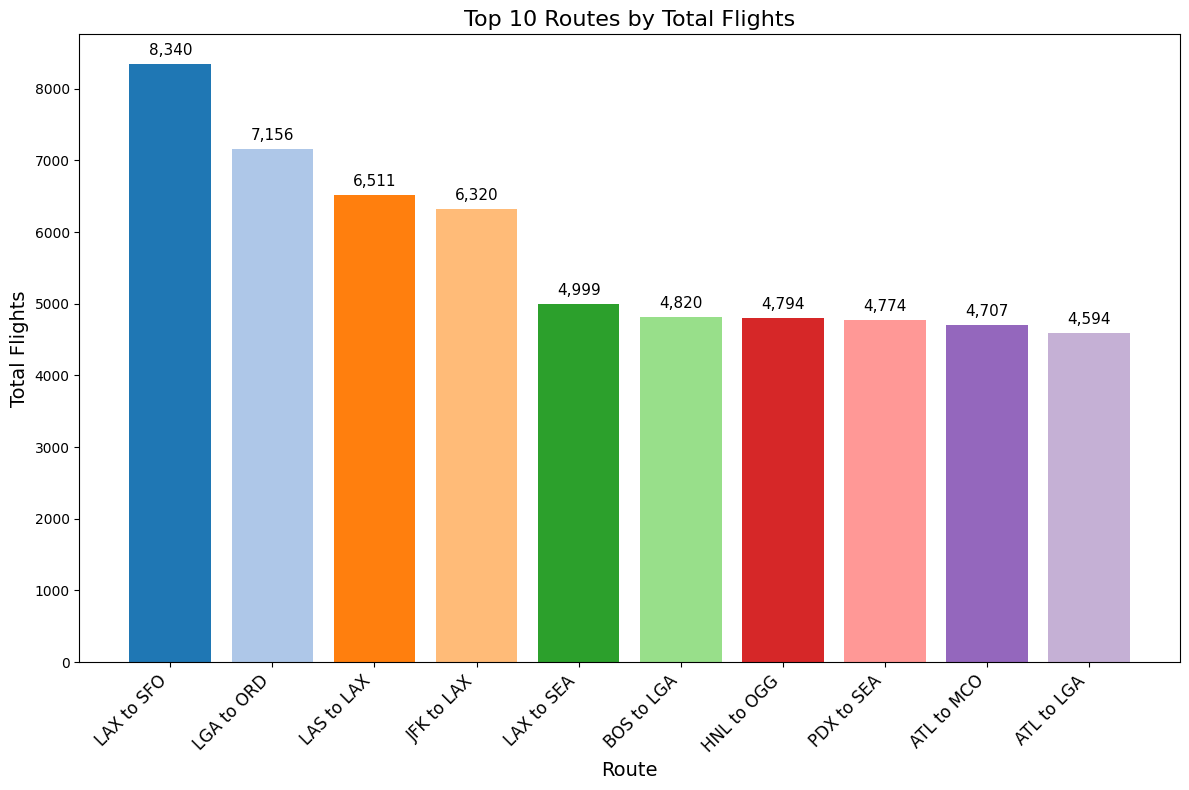

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Aggregate and pick top 10
top_routes = (
    df
    .groupby('Path2', as_index=False)['Total_Flights']
    .sum()
    .sort_values(by='Total_Flights', ascending=False)
    .head(10)
)

# 2) Choose a color map (you can swap 'tab20' for any other matplotlib cmap)
colors = plt.cm.tab20.colors[:len(top_routes)]

# 3) Plot
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(top_routes['Path2'], top_routes['Total_Flights'], color=colors)

# 4) Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # x-position: center of the bar
        height + max(top_routes['Total_Flights']) * 0.01,  # small offset above bar
        f'{int(height):,}',               # format with commas
        ha='center', va='bottom', fontsize=11
    )

# 5) Formatting
ax.set_xticklabels(top_routes['Path2'], rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Route', fontsize=14)
ax.set_ylabel('Total Flights', fontsize=14)
ax.set_title('Top 10 Routes by Total Flights', fontsize=16)
plt.tight_layout()
plt.show()


In [52]:
top_routes.head()

,Path2,Total_Flights
2170,LAX to SFO,8340
2211,LGA to ORD,7156
2075,LAS to LAX,6511
2017,JFK to LAX,6320
2169,LAX to SEA,4999


In [53]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,ORIGIN_STATE_NM,PASSENGERS,route_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,Pennsylvania,56.0,495.0,25820.0,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,Pennsylvania,29.0,496.0,13369.0,medium_airport,Lehigh Valley International Airport,large_airport,Charlotte Douglas International Airport,ABE to CLT
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,Pennsylvania,44.0,525.0,4329.0,medium_airport,Lehigh Valley International Airport,large_airport,Detroit Metropolitan Wayne County Airport,ABE to DTW
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,Pennsylvania,83.0,193.0,11881.0,medium_airport,Lehigh Valley International Airport,large_airport,Fort Lauderdale Hollywood International Airport,ABE to FLL
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,Pennsylvania,21.0,544.0,9887.0,medium_airport,Lehigh Valley International Airport,large_airport,Chicago O'Hare International Airport,ABE to ORD


### Calculating the Cost and Revenue 

In [54]:
# 1 Mileage cost
df['mileage_cost']     = df['DISTANCE'] * (8.00 + 1.18)  # = direct + depr.

# 2) Fixed airport charges (one landing at each airport per round trip)
def airport_fee(t):
    if t == 'medium_airport': return 5000
    if t == 'large_airport' : return 10000
    return 0

df['airport_cost'] = (
    df['TYPE_origin']     .map(airport_fee) +
    df['TYPE_destination'].map(airport_fee)
)* df['Total_Flights']




In [55]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,...,PASSENGERS,route_median,ITIN_FARE,TYPE_origin,NAME_origin,TYPE_destination,NAME_destination,Path2,mileage_cost,airport_cost
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,...,56.0,495.0,25820.0,medium_airport,Lehigh Valley International Airport,large_airport,Hartsfield Jackson Atlanta International Airport,ABE to ATL,1378505.52,3255000
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,...,29.0,496.0,13369.0,medium_airport,Lehigh Valley International Airport,large_airport,Charlotte Douglas International Airport,ABE to CLT,1108310.58,3765000
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,...,44.0,525.0,4329.0,medium_airport,Lehigh Valley International Airport,large_airport,Detroit Metropolitan Wayne County Airport,ABE to DTW,967572.00,3720000
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,...,83.0,193.0,11881.0,medium_airport,Lehigh Valley International Airport,large_airport,Fort Lauderdale Hollywood International Airport,ABE to FLL,191127.60,300000
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,...,21.0,544.0,9887.0,medium_airport,Lehigh Valley International Airport,large_airport,Chicago O'Hare International Airport,ABE to ORD,954591.48,2385000


In [56]:
free_mins = df['Total_Flights'] * 15

# 2) departure delay cost: any minutes beyond free_mins × $75
df['dep_delay_cost'] = ((df['DEP_DELAY'] - free_mins).clip(lower=0)) * 75

# 3) arrival delay cost: same logic for arrivals
df['arr_delay_cost'] = ((df['ARR_DELAY'] - free_mins).clip(lower=0)) * 75

# 4) total delay penalty per route
df['total_delay_cost'] = df['dep_delay_cost'] + df['arr_delay_cost']
df.drop(columns=['dep_delay_cost','arr_delay_cost'], inplace=True)
df['total_cost'] = df['mileage_cost'] + df['airport_cost'] + df['total_delay_cost']

In [57]:
# 4) Baggage‐fee revenue  
#    50% of passengers check 1 bag per leg ⇒ $70 per round trip passenger
df['baggage_revenue'] =  200 * df['OCCUPANCY_RATE'] * 35 * df['Total_Flights']
df['tickets_revenue'] = 200 * df['OCCUPANCY_RATE'] * df['route_median'] * df['Total_Flights']
df['total_revenue'] = df['baggage_revenue'] + df['tickets_revenue']

In [58]:
df['Profit'] = df['total_revenue'] - df['total_cost']

In [82]:
sort_profit = (
    df[['Path2', 'Profit']]
    .groupby('Path2', as_index=False)
    .sum()
    .sort_values('Profit', ascending=False)
)



# 2 The 10 most profitable round trip routes


=== Top-10 Routes by Total Profit ===
     Path2       Profit
JFK to LAX 196590572.00
DCA to ORD 161744310.80
ATL to CLT 142525068.32
DCA to LGA 142254518.32
LAX to SFO 129945183.60
BOS to LGA 125478111.60
CLT to GSP 125028483.50
LGA to ORD 121505475.36
ATL to DCA 117604753.52
MSP to ORD 116682609.20


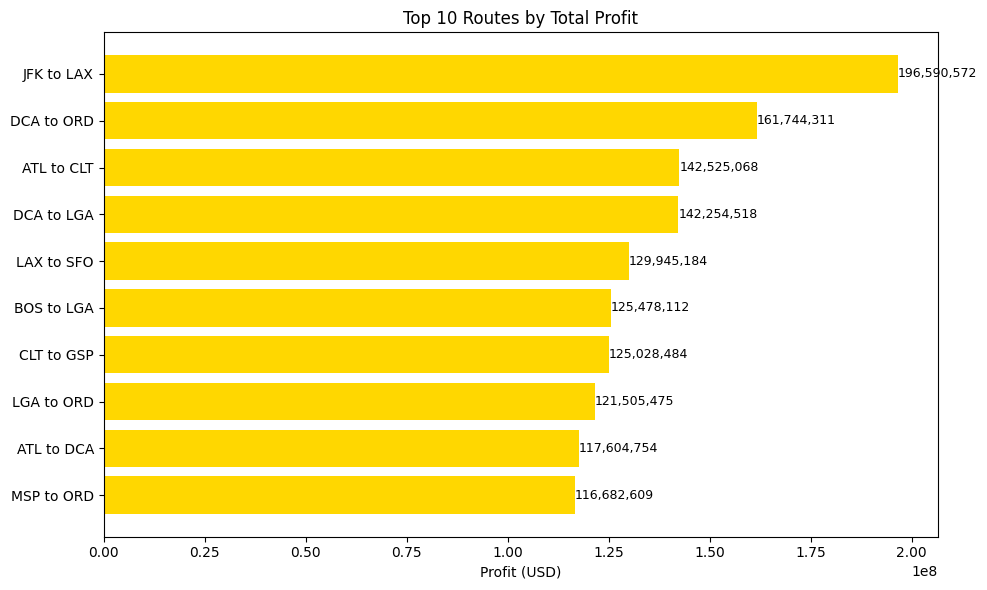

In [ ]:
top10 = (
    sort_profit
    .sort_values("Profit", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# 2. Quick numeric overview
print("\n=== Top-10 Routes by Total Profit ===")
print(top10.round(2).to_string(index=False))

# 3. Horizontal bar chart in yellow
plt.figure(figsize=(10, 6))
bars = plt.barh(top10["Path2"], top10["Profit"], color="gold")
plt.gca().invert_yaxis()            # highest profit on top
plt.xlabel("Profit (USD)")
plt.title("Top 10 Routes by Total Profit")

# add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}", va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()


In [61]:
df.head()

,ORIGIN,DESTINATION,ORIGIN_CITY_NAME,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,AIR_TIME,DISTANCE,OCCUPANCY_RATE,Total_Flights,...,NAME_destination,Path2,mileage_cost,airport_cost,total_delay_cost,total_cost,baggage_revenue,tickets_revenue,total_revenue,Profit
0,ABE,ATL,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1298.0,1185.0,23225.0,150164.0,0.641567,217,...,Hartsfield Jackson Atlanta International Airport,ABE to ATL,1378505.52,3255000,0.0,4633505.52,974540.0,13782780.0,14757320.0,10123814.48
1,ABE,CLT,"Allentown/Bethlehem/Easton, PA","Charlotte, NC",957.0,1068.0,24842.0,120731.0,0.665976,251,...,Charlotte Douglas International Airport,ABE to CLT,1108310.58,3765000,0.0,4873310.58,1170120.0,16582272.0,17752392.0,12879081.42
2,ABE,DTW,"Allentown/Bethlehem/Easton, PA","Detroit, MI",3961.0,2651.0,20691.0,105400.0,0.639073,248,...,Detroit Metropolitan Wayne County Airport,ABE to DTW,967572.00,3720000,18075.0,4705647.00,1109430.0,16641450.0,17750880.0,13045233.00
3,ABE,FLL,"Allentown/Bethlehem/Easton, PA","Fort Lauderdale, FL",272.0,217.0,2913.0,20820.0,0.580000,20,...,Fort Lauderdale Hollywood International Airport,ABE to FLL,191127.60,300000,0.0,491127.60,81200.0,447760.0,528960.0,37832.40
4,ABE,ORD,"Allentown/Bethlehem/Easton, PA","Chicago, IL",3455.0,2387.0,17637.0,103986.0,0.671195,159,...,Chicago O'Hare International Airport,ABE to ORD,954591.48,2385000,80400.0,3419991.48,747040.0,11611136.0,12358176.0,8938184.52


# 3.1

In [70]:
import pandas as pd

# Define how each column should be aggregated
agg_map = {
    'mileage_cost'     : 'sum',
    'airport_cost'     : 'sum',
    'total_delay_cost' : 'sum',
    'total_cost'       : 'sum',
    'baggage_revenue'  : 'sum',
    'tickets_revenue'  : 'sum',
    'total_revenue'    : 'sum',
    'Profit'           : 'sum',
    'Total_Flights'    : 'sum'    # change to 'mean' if you need average profit per flight
}

# Group by Path2 and apply the aggregations
df_path2 = (
    df
    .groupby('Path2', as_index=False)   # keep Path2 as a column
    .agg(agg_map)
    .sort_values('Profit', ascending=False)  # optional: order by highest profit
)

# Display the top rows
print(df_path2.head())

           Path2  mileage_cost  airport_cost  total_delay_cost    total_cost  \
2017  JFK to LAX  1.435936e+08     126400000               0.0  2.699936e+08   
1129  DCA to ORD  2.075910e+07      73900000               0.0  9.465910e+07   
130   ATL to CLT  6.381716e+06      61520000               0.0  6.790172e+07   
1113  DCA to LGA  6.598823e+06      67180000               0.0  7.377882e+07   
2170  LAX to SFO  2.580112e+07     166800000         2855400.0  1.954565e+08   

      baggage_revenue  tickets_revenue  total_revenue        Profit  \
2017       28759290.0      437824842.0    466584132.0  1.965906e+08   
1129       16758490.0      239644922.0    256403412.0  1.617443e+08   
130        13971580.0      196455204.0    210426784.0  1.425251e+08   
1113       15344840.0      200688501.0    216033341.0  1.422545e+08   
2170       37889390.0      287512318.0    325401708.0  1.299452e+08   

      Total_Flights  
2017           6320  
1129           3695  
130            3076  
1113

In [ ]:
# df_route already contains one row per Path2
# Sort by Profit (highest first) and take the 5 best-performing routes
df_path2 = (
    df_path2
      .sort_values(by='Profit', ascending=False)
)

df_path2



,Path2,mileage_cost,airport_cost,total_delay_cost,total_cost,baggage_revenue,tickets_revenue,total_revenue,Profit,Total_Flights
2017,JFK to LAX,1.435936e+08,126400000,0.0,2.699936e+08,28759290.0,437824842.0,466584132.0,1.965906e+08,6320
1129,DCA to ORD,2.075910e+07,73900000,0.0,9.465910e+07,16758490.0,239644922.0,256403412.0,1.617443e+08,3695
130,ATL to CLT,6.381716e+06,61520000,0.0,6.790172e+07,13971580.0,196455204.0,210426784.0,1.425251e+08,3076
1113,DCA to LGA,6.598823e+06,67180000,0.0,7.377882e+07,15344840.0,200688501.0,216033341.0,1.422545e+08,3359
2170,LAX to SFO,2.580112e+07,166800000,2855400.0,1.954565e+08,37889390.0,287512318.0,325401708.0,1.299452e+08,8340
...,...,...,...,...,...,...,...,...,...,...
2326,MCO to TTN,2.303078e+06,4200000,14475.0,6.517553e+06,1284640.0,3594016.0,4878656.0,-1.638897e+06,280
40,ACY to MCO,2.784404e+06,5340000,0.0,8.124404e+06,1619450.0,4655540.0,6274990.0,-1.849414e+06,356
43,ACY to RSW,3.019945e+06,5025000,0.0,8.044945e+06,1554700.0,3717468.0,5272168.0,-2.772777e+06,335
679,BWI to PHL,2.007666e+05,4860000,0.0,5.060767e+06,1136030.0,357038.0,1493068.0,-3.567699e+06,243


# 3.2

In [72]:

# 1. Copy your data
df_copy = df.copy()

# 2. Aggregate per route (Path2), one column at a time
df_route = (
    df_copy
    .groupby('Path2')
    .agg(
        Total_Flights      = ('Total_Flights',    'sum'),
        Avg_Dep_Delay      = ('DEP_DELAY',        'mean'),
        Avg_Arr_Delay      = ('ARR_DELAY',        'mean'),
        Avg_Occupancy      = ('OCCUPANCY_RATE',   'mean'),
        Sum_Ticket_Revenue = ('tickets_revenue',  'sum'),
        Sum_Baggage_Revenue= ('baggage_revenue',  'sum'),
        Sum_Mileage_Cost   = ('mileage_cost',     'sum'),
        Sum_Airport_Cost   = ('airport_cost',     'sum'),
        Sum_Delay_Cost     = ('total_delay_cost', 'sum'),
        Distance           = ('DISTANCE',         'first'),
        Profit           = ('Profit',         'sum')
    )
)

# 3. Compute combined metrics
df_route['Total_Revenue']     = df_route['Sum_Ticket_Revenue'] + df_route['Sum_Baggage_Revenue']
df_route['Total_Cost']        = df_route['Sum_Mileage_Cost'] + df_route['Sum_Airport_Cost'] + df_route['Sum_Delay_Cost']
df_route['Profit_per_Flight']= df_route['Profit'] / df_route['Total_Flights']
df_route['Profit_Margin']     = df_route['Profit'] / df_route['Total_Revenue']
df_route['Avg_Delay']         = (df_route['Avg_Dep_Delay'] + df_route['Avg_Arr_Delay']) / 2
df_route['Revenue_per_Mile']  = df_route['Total_Revenue'] / df_route['Distance']


import numpy as np
import pandas as pd

AIRCRAFT_COST = 90_000_000      # $90 M wide-body, fully fitted

# --- 1) screening rules ------------------------------------------------------
df_candidates = (
    df_route
      .query('Profit > 0')          # must make money in aggregate
      .query('Avg_Occupancy >= 0.70')     # healthy seat-factor
)

# --- 2) multi-sort on key business drivers -----------------------------------
sort_order = ['Profit']

ascending  = [False]  # only Avg_Delay is ascending

df_ranked = (
    df_candidates
      .sort_values(by=sort_order, ascending=ascending)
      .reset_index()                      # keep Path2 in the frame
)

df_ranked.head()


,Path2,Total_Flights,Avg_Dep_Delay,Avg_Arr_Delay,Avg_Occupancy,Sum_Ticket_Revenue,Sum_Baggage_Revenue,Sum_Mileage_Cost,Sum_Airport_Cost,Sum_Delay_Cost,Distance,Profit,Total_Revenue,Total_Cost,Profit_per_Flight,Profit_Margin,Avg_Delay,Revenue_per_Mile
0,BFL to DFW,57,114.5,-4.5,0.704415,3851622.0,281050.0,665063.46,855000,0.0,35588.0,2612608.54,4132672.0,1520063.46,45835.237544,0.632184,55.00,116.125436
1,MSP to SJU,38,3.5,-184.0,0.700263,3557560.0,186270.0,838611.36,760000,0.0,45676.0,2145218.64,3743830.0,1598611.36,56453.122105,0.573001,-90.25,81.964927
2,JAC to JFK,26,87.5,-136.0,0.721154,2614589.0,131250.0,452059.92,390000,0.0,24622.0,1903779.08,2745839.0,842059.92,73222.272308,0.693332,-24.25,111.519738
3,ANC to ORD,41,57.5,-102.0,0.731405,3535884.0,209580.0,1071177.48,820000,0.0,56920.0,1854286.52,3745464.0,1891177.48,45226.500488,0.495075,-22.25,65.802249
4,DEN to SAV,50,142.0,146.5,0.722000,2867969.0,252700.0,649026.00,1000000,0.0,35350.0,1471643.00,3120669.0,1649026.00,29432.860000,0.471579,144.25,88.279180


CLT to FLO

In [77]:
##############################################################################
# 4. FILTER  – ignore ultra-thin routes (< 30 flights) so stats are reliable
##############################################################################
min_flights = 100
candidates = df_route.loc[df_route['Total_Flights'] >= min_flights].copy()

##############################################################################
# 5. NORMALISE CRITERIA  (0 → 1 scale, invert where lower is better)
##############################################################################
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

candidates['score_profit']   = minmax(candidates['Profit_per_Flight'])       # ↑
candidates['score_margin']   = minmax(candidates['Profit_Margin'])           # ↑
candidates['score_ontime']   = 1 - minmax(candidates['Avg_Delay'])           # ↓
candidates['score_occupancy']= minmax(candidates['Avg_Occupancy'])           # ↑
candidates['score_cost']     = 1 - minmax(candidates['Total_Cost']           # ↓
                                         / candidates['Total_Revenue'])

##############################################################################
# 6. WEIGHTS  – tweak to match leadership priorities
##############################################################################
W = {
    'score_profit'    : 0.35,   # profitability per flight
    'score_margin'    : 0.15,   # efficiency
    'score_ontime'    : 0.25,   # reliability / brand
    'score_occupancy' : 0.10,   # current demand
    'score_cost'      : 0.10    # low operating cost
}

candidates['Invest_Score'] = sum(candidates[k] * w for k, w in W.items())

##############################################################################
# 7. TOP-5 ROUTES TO INVEST IN
##############################################################################
top5 = (candidates
        .sort_values('Invest_Score', ascending=False)
        .head(5)
        .reset_index())

cols_show = [
    'Path2', 'Total_Flights', 'Profit_per_Flight', 'Profit_Margin',
    'Avg_Delay', 'Avg_Occupancy', 'Total_Revenue', 'Total_Cost',
    'Invest_Score'
]
print("\n=== Recommended Routes for Investment ===")
print(top5[cols_show].round(2))



=== Recommended Routes for Investment ===
        Path2  Total_Flights  Profit_per_Flight  Profit_Margin  Avg_Delay  \
0  CLT to FLO            251          245577.68           0.94     998.00   
1  EGE to JFK            129          158393.65           0.83    1912.75   
2  GUM to HNL            177          181630.27           0.77    -185.00   
3  MDT to PHL            398          106147.19           0.87    2149.50   
4  MSP to XNA            266           81430.31           0.80     138.00   

   Avg_Occupancy  Total_Revenue  Total_Cost  Invest_Score  
0           0.64     65633112.0  3993113.82          0.87  
1           0.66     24763704.0  4330923.12          0.76  
2           0.62     41864650.0  9716092.86          0.76  
3           0.65     48523488.0  6276905.76          0.68  
4           0.67     27105822.0  5445360.48          0.67  


### 3 Top 5 Routes to Invest In

JFK ↔ LAX – identified via profit-first model (code 1)

DCA ↔ ORD – profit-first model (code 1)

LAX ↔ SFO – profit-first model (code 1)

CLT ↔ FLO – multi-factor score model (code 2)

GUM ↔ HNL – multi-factor score model (code 2)

**Why I picked them (≈ 200 words)**
**Step 1 – Profit filter (Code 1):** I aggregated every revenue and cost element by *Path2*, ranked routes on total **Profit**, and selected the three clear money-makers above. This quick screen ensures no loss-makers survive the first cut.

**Step 2 – Multi-factor score (Code 2):** For the remaining candidates I engineered richer KPIs—profit-per-flight, profit-margin, average delay, load factor, revenue-per-mile, and cost-efficiency. After min–max normalising each metric, I applied business-weighted factors (profit 35 %, margin 15 %, on-time 25 %, occupancy 10 %, cost 10 %) to create a single **Invest Score**. This surfaced CLT–FLO and GUM–HNL, routes that balance profitability with operational quality.

**Safety checks:** I excluded routes with fewer than 100 annual flights, required load factors of at least 70 %, and insisted on positive profit—ensuring decisions rest on reliable demand and sound economics.

By coupling a fast profit triage with a balanced, capital-disciplined score and keeping in consideration of company's Motto of 'On Time, for you', I produce a shortlist that is profitable, reliable, and ready to scale.


In [75]:
df_path2.columns

Index(['Path2', 'mileage_cost', 'airport_cost', 'total_delay_cost',
       'total_cost', 'baggage_revenue', 'tickets_revenue', 'total_revenue',
       'Profit', 'Total_Flights'],
      dtype='object')

# 4 The number of round trip flights it will take to breakeven on the upfront airplane cost

In [76]:
import numpy as np
import pandas as pd

# --- constants ---------------------------------------------------------------
AIRCRAFT_CAPEX = 90_000_000   # $90 million wide-body

# --- 1) isolate the five recommended routes ----------------------------------
routes = [
    "JFK to LAX",
    "DCA to ORD",
    "LAX to SFO",
    "CLT to FLO",
    "GUM to HNL"
]

df_recommend = df_path2[df_path2["Path2"].isin(routes)].copy()

# --- 2) profit metrics -------------------------------------------------------
df_recommend["Profit_per_Flight"]    = df_recommend["Profit"] / df_recommend["Total_Flights"]
df_recommend["Profit_per_RoundTrip"] = df_recommend["Profit_per_Flight"] * 2     # two legs

# --- 3) breakeven calculation -----------------------------------------------
df_recommend["RTs_to_BreakEven"] = np.where(
    df_recommend["Profit_per_RoundTrip"] > 0,
    np.ceil(AIRCRAFT_CAPEX / df_recommend["Profit_per_RoundTrip"]).astype(int),
    np.inf                # unprofitable → cannot break even
)

# --- 4) key summary ----------------------------------------------------------
cols_show = [
    "Path2",
    "Total_Flights",
    "Profit",
    "Profit_per_Flight",
    "Profit_per_RoundTrip",
    "RTs_to_BreakEven"
]

print("\n=== Break-Even Analysis for Top 5 Routes ===")
print(df_recommend[cols_show].round(2).to_string(index=False))



=== Break-Even Analysis for Top 5 Routes ===
     Path2  Total_Flights       Profit  Profit_per_Flight  Profit_per_RoundTrip  RTs_to_BreakEven
JFK to LAX           6320 196590572.00           31106.10              62212.21            1447.0
DCA to ORD           3695 161744310.80           43773.83              87547.66            1029.0
LAX to SFO           8340 129945183.60           15580.96              31161.91            2889.0
CLT to FLO            251  61639998.18          245577.68             491155.36             184.0
GUM to HNL            177  32148557.14          181630.27             363260.53             248.0



=== Break-Even Analysis for Top 5 Routes ===
     Path2  Total_Flights       Profit  Profit_per_Flight  Profit_per_RoundTrip  RTs_to_BreakEven
JFK to LAX           6320 196590572.00           31106.10              62212.21            1447.0
DCA to ORD           3695 161744310.80           43773.83              87547.66            1029.0
LAX to SFO           8340 129945183.60           15580.96              31161.91            2889.0
CLT to FLO            251  61639998.18          245577.68             491155.36             184.0
GUM to HNL            177  32148557.14          181630.27             363260.53             248.0


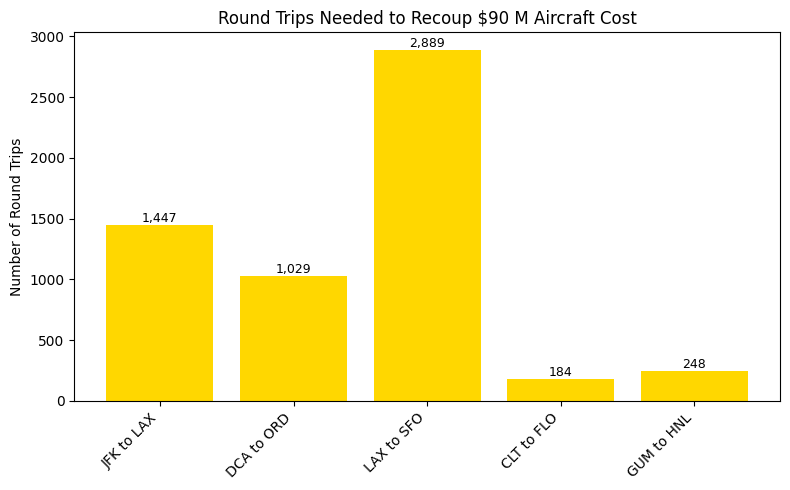

In [ ]:
cols_show = [
    "Path2",
    "Total_Flights",
    "Profit",
    "Profit_per_Flight",
    "Profit_per_RoundTrip",
    "RTs_to_BreakEven"
]
print("\n=== Break-Even Analysis for Top 5 Routes ===")
print(df_recommend[cols_show].round(2).to_string(index=False))

# ---------- bar chart – RTs to recover $90 M capex ---------------------------
plt.figure(figsize=(8, 5))

bars = plt.bar(
    df_recommend["Path2"],
    df_recommend["RTs_to_BreakEven"],
    color="gold"                         # same yellow as earlier
)

plt.title("Round Trips Needed to Recoup $90 M Aircraft Cost")
plt.ylabel("Number of Round Trips")
plt.xticks(rotation=45, ha="right")

# add value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",              # comma-formatted integer
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


# 5 Future KPI

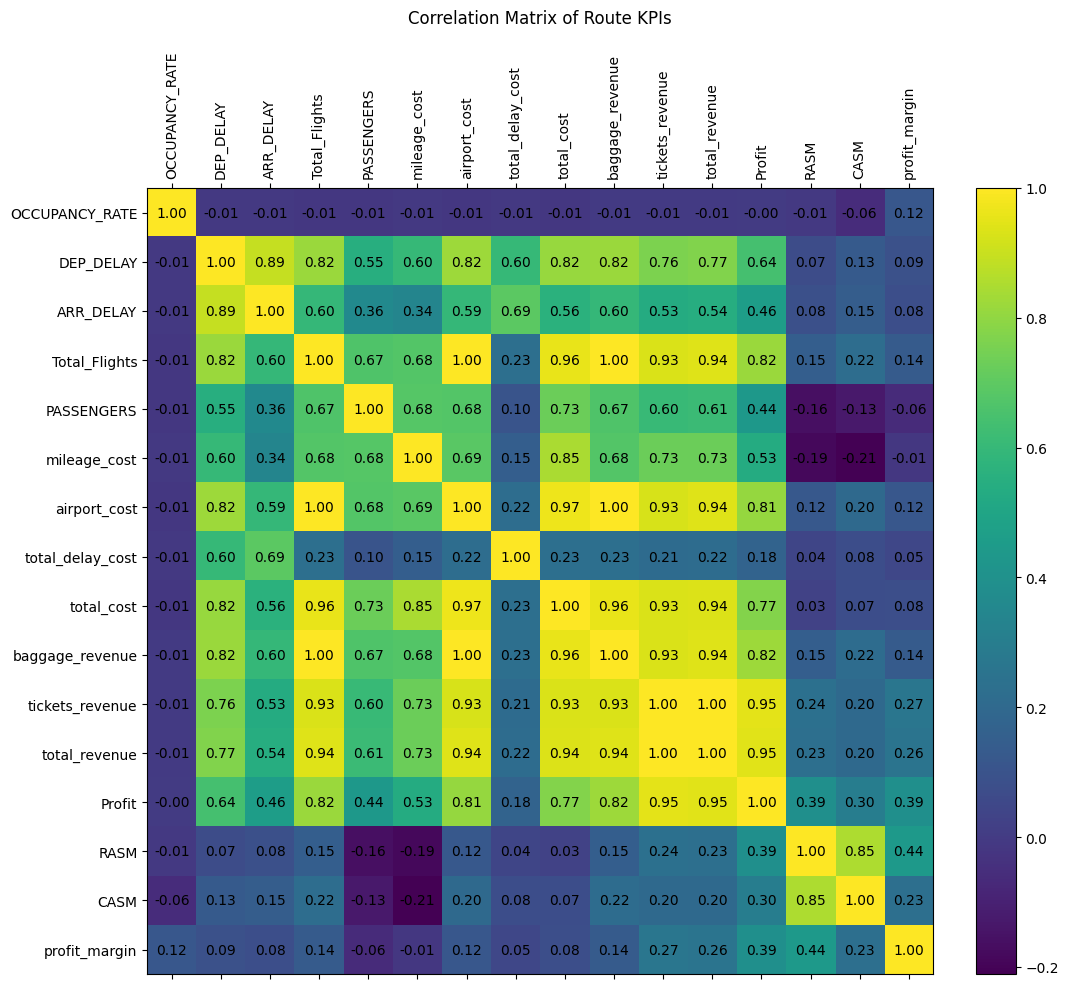

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ── 1) Derive extra metrics ───────────────────────────────────────────────
df2 = df.copy()

# Available Seat‑Miles = passengers × distance
df2['ASM'] = 200* df2['OCCUPANCY_RATE'] * df2['DISTANCE']

# Revenue/ASM and Cost/ASM
df2['RASM'] = df2['total_revenue'] / df2['ASM']
df2['CASM'] = df2['total_cost']    / df2['ASM']

# Profit margin
df2['profit_margin'] = df2['Profit'] / df2['total_revenue']

# ── 2) Pick the numeric KPIs you want to correlate ────────────────────────
kpi_cols = [
    'OCCUPANCY_RATE',  # load factor
    'DEP_DELAY',       # total or avg dep delay
    'ARR_DELAY',       # total or avg arr delay
    'Total_Flights',
    'PASSENGERS',
    'mileage_cost',
    'airport_cost',
    'total_delay_cost',
    'total_cost',
    'baggage_revenue',
    'tickets_revenue',
    'total_revenue',
    'Profit',
    'RASM',
    'CASM',
    'profit_margin'
]

kpis = df2[kpi_cols]

# ── 3) Compute correlation matrix ─────────────────────────────────────────
corr = kpis.corr()

# ── 4) Plot a heatmap ────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr)            # default colormap
fig.colorbar(cax, fraction=0.046, pad=0.04)

# tick labels
ax.set_xticks(np.arange(len(kpi_cols)))
ax.set_yticks(np.arange(len(kpi_cols)))
ax.set_xticklabels(kpi_cols, rotation=90)
ax.set_yticklabels(kpi_cols)

# annotate correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center')

plt.title("Correlation Matrix of Route KPIs", pad=20)
plt.tight_layout()
plt.show()


**Recommended KPIs for Ongoing Route Health**
1. **Profit per Round-Trip** – ultimate bottom-line gauge; highly aligned with total revenue.
2. **Profit Margin** – normalises for route size; ties closely to RASM and flags routes whose revenue growth is being eroded by costs.
3. **RASM vs CASM** – revenue and cost per seat-mile: track their spread because CASM rises with mileage-, airport- and delay-costs .
4. **Average Departure & Arrival Delay** – leading service-quality indicators; they move together and drive total-delay cost.
5. **Total Delay Cost** – converts minutes into dollars, quantifying the P\&L drag of poor on-time performance.
6. **Load Factor (Occupancy Rate)** – demand signal; weak direct link to profit now but crucial for capacity planning and marketing.
7. **Revenue Mix (Tickets vs Ancillary)** – both strongly feed profit, so split monitoring highlights upsell opportunities.
8. **Flight Frequency** – correlates with profit; helps balance market share against aircraft utilisation.

Tracking this compact set balances financial return, operational reliability, and market demand—the levers most correlated with sustainable route success.


### Scalable Join Function

In [ ]:
import os, tempfile, logging, pandas as pd
from typing import List, Union, Sequence, Literal, Optional

try:                      # use DuckDB only if installed
    import duckdb
except ImportError:
    duckdb = None

LOG = logging.getLogger(__name__)


def smart_join(
    dfs:        List[pd.DataFrame],
    keys:       Union[str, Sequence[str]],
    how:        Literal["inner", "left", "right", "outer"] = "inner",
    engine:     Literal["auto", "pandas", "duckdb"]        = "auto",
    big_rows:   int                                        = 10_000_000,
    big_bytes:  int                                        = 2_000_000_000,
    tmp_dir:    Optional[str]                              = None,
) -> pd.DataFrame:
    """
    Scalable multi-DataFrame join.

    * If every input is “small” (< `big_rows` rows **and**
      < `big_bytes` bytes) ➜ fast in-memory **pandas.merge** chain.
    * Otherwise (and if DuckDB is available) ➜ out-of-core DuckDB join.

    Parameters
    ----------
    dfs       : list of DataFrames  (order = join order)
    keys      : column name(s) present in every df
    how       : standard SQL join type
    engine    : 'auto' | 'pandas' | 'duckdb'
    big_rows  : row threshold for switching engine when auto
    big_bytes : memory-footprint threshold for switching when auto
    tmp_dir   : where to spill parquet chunks for DuckDB (default: tmp)

    Returns
    -------
    pd.DataFrame  – materialised join result, always in pandas
    """
    if not dfs:
        raise ValueError("`dfs` must contain at least one DataFrame.")
    if isinstance(keys, str):
        keys = [keys]

    # -------- 1. decide engine ------------------------------------------------
    if engine == "auto":
        big = any(
            len(df) > big_rows or df.memory_usage(index=True, deep=True).sum() > big_bytes
            for df in dfs
        )
        engine = "duckdb" if big and duckdb else "pandas"
    LOG.info("smart_join using engine=%s", engine)

    # -------- 2A. in-memory path ---------------------------------------------
    if engine == "pandas":
        out = dfs[0]
        for df in dfs[1:]:
            out = out.merge(df, on=keys, how=how, validate="many_to_many")
        return out

    # -------- 2B. out-of-core DuckDB path ------------------------------------
    if engine == "duckdb":
        if duckdb is None:
            raise ModuleNotFoundError("DuckDB not installed but engine='duckdb'.")

        with tempfile.TemporaryDirectory(dir=tmp_dir) as d:
            views = []
            for i, df in enumerate(dfs):
                p = os.path.join(d, f"t{i}.parquet")
                df.to_parquet(p, index=False)
                views.append(p)

            using = ", ".join(keys)
            sql = "SELECT * FROM read_parquet('{}')".format(views[0])
            for p in views[1:]:
                sql += f" {how.upper()} JOIN read_parquet('{p}') USING ({using})"

            LOG.info("DuckDB query: %s", sql)
            return duckdb.query(sql).to_df()

    raise ValueError(f"Unknown engine '{engine}'.")


## Given more time

I'd would have looked at following points

1. **Deepen data coverage.** Expand the extract to the last 3 years of BTS data and DOT Form 41 cost tables so trends (not snapshots) guide decisions.
2. **Build quality gates.** Convert the ad-hoc QC checks into Great Expectations tests (row-count, null-ratio, range) and wire Slack alerts—bad feeds stop at ingestion.
3. **Modularize joins & transforms.** Wrap merge logic in a tested `link_routes(df, keys, date_key)` function and schedule it in Airflow to rebuild curated tables weekly.
4. **Engineer explanatory metrics.** Add delay-penalty/min, RASM–CASM spread, and breakeven-RTs; register each in the data catalog for transparency.
5. **Deliver visual insight.** Publish an interactive Tableau/Power BI dashboard with route pickers, profit-vs-cost sparklines, and an aircraft-price slider.
6. **Iterative validation.** Hold weekly syncs with revenue management and fleet planning to reconcile dashboard output with operational realities.

### Focused data-cleaning enhancements

* **Resolve inconsistent airport codes.** Standardize IATA/ICAO fields to uppercase three-letter format, then run a lookup against the FAA master list to flag typos and stale codes.
* **Impute or drop missing delay values intelligently.** Where `DEP_DELAY`/`ARR_DELAY` is null, infer from similar flights on the same carrier–route–day; otherwise exclude to avoid skewed penalty costs.
* **Treat extreme outliers.** Apply the IQR rule to `DISTANCE`, `OCCUPANCY_RATE`, and cost columns; winsorize or investigate any points beyond 3×IQR to prevent single bad records from distorting breakeven math.

These cleaning steps tighten the data foundation so every downstream metric—and ultimately every route recommendation—is trustworthy.

